# Import Libraries
- Python libraries and packages used in this study
- Connecting users' google drive to the notebook

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import seaborn as sns
import statistics

# import necessary packages
import pandas as pd
from copy import deepcopy as copy
import numpy as np
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from sklearn import datasets
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
from collections import Counter



In [ ]:
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/THESIS/Methodology/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Balancing the Data
- Downsampling data: to remove unbuildable areas
- Upsampling data: generate data points with '1' label (just to teach the model)
- Dataframe set up: normalizing data
- Dataframes: Filtering low accessible areas (to get potential areas to put up an RHU on)

## Downsampling: remove unbuildable areas

In [ ]:
sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
2,20.0,49.0,Pag-Asa,PH175109004,NaN,0.0,154.538807,0.0,0.0,3.0,2.0,0.0,0.0,1151.197170,MID,1
3,21.0,50.0,San Agustin,PH175109004,Built Up,0.0,214.812672,0.0,0.0,3.0,2.0,0.0,0.0,1600.191852,MID,1
4,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1060.0,1363.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,16.884621,0.0,0.0,0.0,0.0,3.0,1.0,235.553869,LOW,0
969,1061.0,1364.0,Pag-Asa,PH175109003,NaN,0.0,21.536779,0.0,0.0,0.0,0.0,3.0,0.0,293.994123,LOW,0
970,1062.0,1397.0,Pag-Asa,PH175109003,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,LOW,0
971,1072.0,1398.0,Pag-Asa,PH175109003,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,LOW,0


In [ ]:
# print(sablayan_clustered_df['RHU'].unique())
# print(sablayan_clustered_df[sablayan_clustered_df['RHU'] == 1])
hex_with_rhu = sablayan_clustered_df[sablayan_clustered_df['RHU'] == 1]
hex_with_rhu

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
16,43.0,93.0,Batong Buhay,PH175109002,Built Up,1.0,1590.110229,47.0,1.0,3.0,2.0,1.0,0.0,0.0,LOW,0
133,191.0,311.0,Pag-Asa,PH175109008,Built Up,1.0,203.314786,5.0,1.0,2.0,0.0,0.0,0.0,0.0,LOW,0
157,224.0,366.0,Burgos,PH175109011,barren,1.0,233.181617,0.0,1.0,0.0,3.0,3.0,0.0,0.0,LOW,0


In [ ]:
sablayan_clustered_df[sablayan_clustered_df['LANDCOVER NUMERICAL'] == 0]  

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
2,20.0,49.0,Pag-Asa,PH175109004,NaN,0.0,154.538807,0.0,0.0,3.0,2.0,0.0,0.0,1151.197170,MID,1
3,21.0,50.0,San Agustin,PH175109004,Built Up,0.0,214.812672,0.0,0.0,3.0,2.0,0.0,0.0,1600.191852,MID,1
5,23.0,58.0,Burgos,PH175109009,Built Up,0.0,1243.892810,13.0,1.0,3.0,2.0,2.0,0.0,5967.815673,HIGH,2
6,24.0,59.0,Burgos,PH175109009,NaN,0.0,0.000000,0.0,0.0,3.0,2.0,2.0,0.0,0.000000,LOW,0
7,34.0,84.0,San Agustin,PH175109004,Annual Crop,0.0,82.983351,0.0,0.0,3.0,2.0,0.0,0.0,618.163167,LOW,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1058.0,1361.0,Pag-Asa,PH175109003,Open Forest,0.0,7.618140,0.0,0.0,0.0,0.0,3.0,0.0,103.993663,LOW,0
967,1059.0,1362.0,Pag-Asa,PH175109003,Open Forest,0.0,8.598491,0.0,0.0,0.0,0.0,3.0,0.0,117.376229,LOW,0
969,1061.0,1364.0,Pag-Asa,PH175109003,NaN,0.0,21.536779,0.0,0.0,0.0,0.0,3.0,0.0,293.994123,LOW,0
970,1062.0,1397.0,Pag-Asa,PH175109003,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,LOW,0


In [ ]:
sablayan_clustered_df.shape

(973, 16)

In [ ]:
print(sablayan_clustered_df['RHU'].unique())
buildable = sablayan_clustered_df[sablayan_clustered_df['RHU'] == 1].index
buildable

[ 0.  1. nan]


Int64Index([16, 133, 157], dtype='int64')

In [ ]:
non_buildable = sablayan_clustered_df[sablayan_clustered_df['LANDCOVER NUMERICAL'] == 0].index
sablayan_clustered_df = sablayan_clustered_df.drop(non_buildable, axis = 0)

In [ ]:
non_buildable.shape

(559,)

In [ ]:
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
4,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2
11,38.0,88.0,Batong Buhay,PH175109004,Brush/Shrubs,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,MID,1
12,39.0,89.0,Malisbong,PH175109004,Brush/Shrubs,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,MID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0
964,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0
965,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0
968,1060.0,1363.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,16.884621,0.0,0.0,0.0,0.0,3.0,1.0,235.553869,LOW,0


In [ ]:
sablayan_clustered_df.shape

(414, 16)

In [ ]:
print(sablayan_clustered_df['RHU'].unique())

[ 0. nan]


In [ ]:
sablayan_clustered_df = sablayan_clustered_df.reset_index(drop=True)

# BPNN preparation

## Dataframe Set-up

In [ ]:
# sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
# sablayan_clustered_df

In [ ]:
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
2,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2
3,38.0,88.0,Batong Buhay,PH175109004,Brush/Shrubs,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,MID,1
4,39.0,89.0,Malisbong,PH175109004,Brush/Shrubs,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,MID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0
410,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0
411,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0
412,1060.0,1363.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,16.884621,0.0,0.0,0.0,0.0,3.0,1.0,235.553869,LOW,0


In [ ]:
sablayan_clustered_df = sablayan_clustered_df.drop(sablayan_clustered_df.index[413])
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
2,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2
3,38.0,88.0,Batong Buhay,PH175109004,Brush/Shrubs,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,MID,1
4,39.0,89.0,Malisbong,PH175109004,Brush/Shrubs,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,MID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1048.0,1327.0,Burgos,PH175109003,Brush/Shrubs,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,LOW,0
409,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0
410,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0
411,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0


In [ ]:
edited_df = sablayan_clustered_df.drop(['BARANGAY', 'PSGC', 'LAND COVERAGE', 'Cluster', 'Unnamed: 0'], axis=1)

In [ ]:
edited_df

,id,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Unnamed: 15
0,22.0,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,0
1,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,0
2,51.0,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,2
3,88.0,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,1
4,89.0,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1327.0,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,0
409,1328.0,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,0
410,1359.0,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,0
411,1360.0,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,0


In [ ]:
edited_df.rename(columns = {'Unnamed: 15':'Cluster'}, inplace = True)

In [ ]:
# Removing mid values in Cluster column
# 1. Remove rows with Cluter values of 1
# 2. Rename clusters 2 to 1
edited_df.drop(edited_df[edited_df['Cluster'] == 1].index, inplace = True)
edited_df['Cluster'] = edited_df['Cluster'].replace(2, 1)
edited_df


,id,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster
0,22.0,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,0
1,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,0
2,51.0,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,1
5,95.0,0.0,181.431633,1.0,1.0,3.0,1.0,2.0,1.0,453.967675,0
6,127.0,0.0,837.013031,0.0,1.0,2.0,1.0,1.0,1.0,2347.191042,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1327.0,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,0
409,1328.0,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,0
410,1359.0,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,0
411,1360.0,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,0


In [ ]:
# searching for values within a pandas dataframe
# if nan, replace with 0
df1 = edited_df[edited_df.isna().any(axis=1)]
df1

,id,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster


In [ ]:
edited_df = edited_df.fillna(0)
edited_df

,id,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster
0,22.0,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,0
1,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,0
2,51.0,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,1
5,95.0,0.0,181.431633,1.0,1.0,3.0,1.0,2.0,1.0,453.967675,0
6,127.0,0.0,837.013031,0.0,1.0,2.0,1.0,1.0,1.0,2347.191042,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1327.0,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,0
409,1328.0,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,0
410,1359.0,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,0
411,1360.0,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,0


## Saving Ids in a different dataframe

In [ ]:
# Making id_template for retrieving hex id numbers in the future
id_template = edited_df.astype({'id' : 'int'})
id_template = id_template.filter(['id'])
id_template

,id
0,22
1,23
2,51
5,95
6,127
...,...
408,1327
409,1328
410,1359
411,1360


In [ ]:
y_sample_id = edited_df.filter(['id', 'Cluster'])

In [ ]:
y_sample_id

,id,Cluster
0,22.0,0
1,23.0,0
2,51.0,1
5,95.0,0
6,127.0,1
...,...,...
408,1327.0,0
409,1328.0,0
410,1359.0,0
411,1360.0,0


In [ ]:
edited_df = edited_df.drop(['id'], axis=1)

In [ ]:
print(sablayan_clustered_df['RHU'].unique())

[0.]


In [ ]:
x = edited_df.loc[:, ~edited_df.columns.isin(['RHU', 'LANDCOVER NUMERICAL'])]
x_normalized = (x - x.min()) / (x.max() - x.min())
x_normalized

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,1.0
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0
6,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,1.0
...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0


In [ ]:
x_normalized['RHU'] = edited_df['RHU']
x_normalized['LANDCOVER NUMERICAL'] = edited_df['LANDCOVER NUMERICAL']
x_normalized

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,1.0,0.0,1.0
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,0.0,1.0
6,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,0.0,1.0
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,0.0,1.0
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,0.0,1.0
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,0.0,1.0


In [ ]:
all_normalized = x_normalized
all_normalized

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,1.0,0.0,1.0
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,0.0,1.0
6,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,0.0,1.0
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,0.0,1.0
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,0.0,1.0
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,0.0,1.0


In [ ]:
# Remove column name 'A' and 'RHU'
x_normalized = x_normalized.drop(['Cluster'], axis=1)
x_normalized 

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,RHU,LANDCOVER NUMERICAL
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,0.0,1.0
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,1.0
6,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,0.0,1.0
...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,1.0
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,1.0
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,1.0
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,1.0


In [ ]:
y_df = edited_df['Cluster'].values
y_df

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
num_features = len(x_normalized.columns)
print("Number of Features: {}".format(num_features))

Number of Features: 9


In [ ]:
columns = []

for i in range(num_features):
    columns.append("x{}".format(i))

x_normalized.columns = columns # replacing the name of the columns
x_normalized

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,0.0,1.0
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,1.0
6,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,0.0,1.0
...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,1.0
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,1.0
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,1.0
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,1.0


In [ ]:
# make y its own dataframe
# Getting the hot encoding for y (making it its own df)
# y = pd.get_dummies(y, prefix='y')
y_df

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_df = pd.DataFrame(y_df, columns = ['Y_Cluster'])

print(y_df)
print(type(y_df))

     Y_Cluster
0            0
1            0
2            1
3            0
4            1
..         ...
368          0
369          0
370          0
371          0
372          0

[373 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


## Upsampling: using smote to generate data points with '1'/high label

In [ ]:
y_sample = edited_df.iloc[:, -1]

In [ ]:
y_sample

0      0
1      0
2      1
5      0
6      1
      ..
408    0
409    0
410    0
411    0
412    0
Name: Cluster, Length: 373, dtype: int64

In [ ]:
# summarize the new class distribution
counter = Counter(y_sample)
print(counter)

Counter({0: 366, 1: 7})


In [ ]:
oversample = SMOTE()
x_normalized, y_sample = oversample.fit_resample(x_normalized, y_sample)

In [ ]:
# summarize the new class distribution
counter = Counter(y_sample)
print(counter) 

Counter({0: 366, 1: 366})


## Filter low accesible areas

In [ ]:
type(all_normalized)

pandas.core.frame.DataFrame

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/My Drive/THESIS/Methodology/all_normalized.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
all_normalized.to_csv(filepath, index=False)  

In [ ]:
all_normalized_df = pd.read_csv(data_dir + 'all_normalized.csv')
all_normalized_df

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0
2,0.361885,0.0,0.0,1.000000,0.333333,0.000000,0.724901,1.0,0.0,1.0
3,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,0.0,1.0
4,1.000000,0.0,1.0,0.666667,0.333333,0.333333,0.688922,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
368,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,0.0,1.0
369,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,0.0,1.0
370,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,0.0,1.0
371,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,0.0,1.0


In [ ]:
# merge Id column before filtering low areas
filtered_low_accessible_df = pd.concat([all_normalized, id_template], axis=1)

In [ ]:
filtered_low_accessible_df = filtered_low_accessible_df[filtered_low_accessible_df['Cluster'] == 0]
filtered_low_accessible_df

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL,id
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0,22
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,0.0,1.0,23
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,0.0,1.0,95
8,0.072154,0.0,1.0,0.666667,0.666667,0.333333,0.042539,0.0,0.0,1.0,129
9,0.047634,0.0,1.0,1.000000,0.333333,0.666667,0.026355,0.0,0.0,1.0,130
...,...,...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,0.0,1.0,1327
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,0.0,1.0,1328
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,0.0,1.0,1359
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,0.0,1.0,1360


In [ ]:
filtered_low_accessible_x = filtered_low_accessible_df.drop(['Cluster'], axis=1)
filtered_low_accessible_x = filtered_low_accessible_x.dropna()

In [ ]:
filtered_low_accessible_x

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,RHU,LANDCOVER NUMERICAL,id
0,0.000000,0.5,1.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0,22
1,0.000000,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.0,1.0,23
5,0.216761,0.5,1.0,1.000000,0.333333,0.666667,0.133244,0.0,1.0,95
8,0.072154,0.0,1.0,0.666667,0.666667,0.333333,0.042539,0.0,1.0,129
9,0.047634,0.0,1.0,1.000000,0.333333,0.666667,0.026355,0.0,1.0,130
...,...,...,...,...,...,...,...,...,...,...
408,0.009968,0.0,0.0,0.000000,0.000000,1.000000,0.034162,0.0,1.0,1327
409,0.011429,0.0,0.0,0.000000,0.000000,1.000000,0.039170,0.0,1.0,1328
410,0.009609,0.0,0.0,0.000000,0.000000,1.000000,0.032931,0.0,1.0,1359
411,0.010659,0.0,0.0,0.000000,0.000000,1.000000,0.036533,0.0,1.0,1360


In [ ]:
filtered_low_accessible_x = filtered_low_accessible_x.drop(['id'], axis=1)

In [ ]:
# replace decimal-ed zeroes with integer zeroes
filtered_low_accessible_df['Cluster'] = filtered_low_accessible_df['Cluster'].astype('int')

In [ ]:
filtered_labels_y = filtered_low_accessible_df['Cluster']
filtered_labels_y

0      0
1      0
5      0
8      0
9      0
      ..
408    0
409    0
410    0
411    0
412    0
Name: Cluster, Length: 366, dtype: int64

In [ ]:
y_filtered_labels_id = filtered_low_accessible_df.filter(['id', 'Cluster'])
y_filtered_labels_id

,id,Cluster
0,22,0
1,23,0
5,95,0
8,129,0
9,130,0
...,...,...
408,1327,0
409,1328,0
410,1359,0
411,1360,0


In [ ]:
#reset indices
y_filtered_labels_id = y_filtered_labels_id.reset_index()

# Model Creation - January 20, 2023
- Created a neural network model to teach it the criteria of what makes a hexagon grid cell accessible using existing data/features provided

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.preprocessing import StandardScaler  

## Splitting the data

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_sample, test_size=0.3)

In [ ]:
train_df, test_df = train_test_split(all_normalized_df, test_size=0.3)

In [ ]:
train_df

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL
205,0.018882,0.0,0.0,0.0,0.0,1.000000,0.064716,0.0,0.0,1.0
324,0.022261,0.0,0.0,0.0,0.0,1.000000,0.076294,0.0,0.0,1.0
366,0.013018,0.0,0.0,0.0,0.0,1.000000,0.044616,0.0,0.0,1.0
153,0.009022,0.0,0.0,0.0,0.0,0.666667,0.031249,0.0,0.0,1.0
164,0.010311,0.0,0.0,0.0,0.0,1.000000,0.035338,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
271,0.005669,0.0,0.0,0.0,0.0,1.000000,0.019431,0.0,0.0,1.0
270,0.003758,0.0,0.0,0.0,0.0,0.666667,0.013017,0.0,0.0,1.0
328,0.013532,0.0,0.0,0.0,0.0,1.000000,0.046378,0.0,0.0,1.0
31,0.054535,0.0,0.0,0.0,1.0,0.666667,0.103821,0.0,0.0,1.0


In [ ]:
test_df

,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,HCFAI,Cluster,RHU,LANDCOVER NUMERICAL
287,0.049493,0.0,0.0,0.0,0.000000,1.000000,0.169629,0.0,0.0,1.0
353,0.020242,0.0,0.0,0.0,0.000000,1.000000,0.069377,0.0,0.0,1.0
224,0.023282,0.0,1.0,0.0,0.000000,1.000000,0.081510,0.0,0.0,1.0
188,0.026919,0.0,0.0,0.0,0.000000,1.000000,0.092259,0.0,0.0,1.0
46,0.050816,0.0,0.0,0.0,0.000000,1.000000,0.174164,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
118,0.023091,0.0,0.0,0.0,0.000000,1.000000,0.079141,0.0,0.0,1.0
305,0.018032,0.0,0.0,0.0,0.000000,1.000000,0.061802,0.0,0.0,1.0
190,0.011935,0.0,0.0,0.0,0.000000,1.000000,0.040905,0.0,0.0,1.0
43,0.018135,0.0,0.0,0.0,0.000000,0.333333,0.064613,0.0,0.0,1.0


## Dataset -> Dataloader

### pandas to tensor

In [ ]:
# x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
# x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
  
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

class TestData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)



## Model Creation


In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
  #Layers are defined here
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )


    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        logits = self.softmax(x)

      # Printing stuff
        # print('Probas from logits:\n', F.softmax(logits, dim=0))
        # print('Log-softmax:\n', F.log_softmax(logits, dim=0))
        # print('Difference between logits and log-softmax:\n', logits - F.log_softmax(logits, dim=0))
        # print('Probas from log-softmax:\n', F.softmax(F.log_softmax(logits, dim=0), dim=0))
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (softmax): Softmax(dim=None)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)


## Optimizing Model Parameters

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
global train_loss_values 
train_loss_values = []

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
      print(batch)
      X, y = X.to(device), y.to(device)

      # Compute prediction error
      pred = model(X)
      pred = F.softmax(pred, dim=-1)
      loss = loss_fn(pred, y)

      # Backpropagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        train_loss_values.append(loss)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")        

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    accuracy = 100*correct

    #Appending to list
    test_average_loss_values.append(test_loss)
    test_accuracy_values.append(accuracy)

    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
def k_fold_splitter(x,y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

  x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
  x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
  
  y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
  y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

  # Splits X and Y tensors
  train_data = TrainData(x_train_tensor, y_train_tensor)
  test_data = TestData(x_test_tensor, y_test_tensor)

  # Data Loader
  BATCH_SIZE = 64 # ✈️ GO BACK TO THIS NEXT SEM - something u can optimize pa
  train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
  test_loader = DataLoader(dataset=test_data, batch_size=1)
  

  return train_loader, test_loader, x_test_tensor, y_test

# Driver code
- Training and testing the model

In [ ]:
global all_train_loss
all_train_loss = []

global all_test_average_loss_values
all_test_average_loss_values  = []

global all_test_accuracy
all_test_accuracy = []

global all_pred_per_kfold
all_pred_per_kfold = []

global all_actual_per_kfold
all_actual_per_kfold = []

global actual_in_kfold
actual_in_kfold = []

global pred_in_kfold
pred_in_kfold = []

global hexid_per_kfold
hexid_per_kfold = []

In [ ]:
for k in range(10):
  print(k)
  train_loader, test_loader, x_test_tensor, y_test = k_fold_splitter(x_normalized, y_sample)

  test_loss_values = []
  test_average_loss_values = []
  test_accuracy_values = []

  # model = NeuralNetwork().to(device)

  epochs = 100
  for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)

  # predictions per k-fold
  predictions = model(x_test_tensor)
  predictions = F.softmax(predictions)
  predictions = torch.argmax(predictions, dim=1)

  pred_in_kfold.append(predictions)

  # actual y values per k-fold
  actual_y = y_test

  # hexids per k-fold
  # hexid = y_test['id'].values

  #🌈 Appending small list to big list
  
  # loss
  all_train_loss.append(train_loss_values)
  all_test_average_loss_values.append(test_average_loss_values)

  # accuracy
  all_test_accuracy.append(test_accuracy_values)

  # y pred and actual y
  actual_in_kfold.append(actual_y)
  all_pred_per_kfold.append(pred_in_kfold)
  all_actual_per_kfold.append(actual_y.tolist())

  # # hexids
  # hexid_per_kfold.append(hexid.tolist())

  print("Done!")


0
Epoch 1
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 65.3%, Avg loss: 0.687210 

Epoch 2
-------------------------------
0
1
2
3
4
5


<ipython-input-65-8769a541269d>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = self.softmax(x)


Test Error: 
 Accuracy: 65.3%, Avg loss: 0.687147 

Epoch 3
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 65.3%, Avg loss: 0.687083 

Epoch 4
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 65.6%, Avg loss: 0.687021 

Epoch 5
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.686958 

Epoch 6
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 66.4%, Avg loss: 0.686895 

Epoch 7
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 66.9%, Avg loss: 0.686832 

Epoch 8
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 67.8%, Avg loss: 0.686770 

Epoch 9
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 67.8%, Avg loss: 0.686707 

Epoch 10
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 67.8%, Avg loss: 0.686645 

Epoch 11
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 68.0%, Avg loss: 0.686583 

Epoch 12
-

<ipython-input-72-63b941eb0cff>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions = F.softmax(predictions)


Streaming output truncated to the last 5000 lines.
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.654250 

Epoch 48
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.654175 

Epoch 49
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.654100 

Epoch 50
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.654026 

Epoch 51
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.653951 

Epoch 52
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.653876 

Epoch 53
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.653801 

Epoch 54
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.653725 

Epoch 55
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.653649 

Epoch 56
-------------------------------
0
1
2


In [ ]:
i = 0
for hexlist in hexid_per_kfold:
  new_hexlist = []
  # print(hexlist)
  for j in hexlist:
    # print(j)
    temp = int(j)
    new_hexlist.append(temp)
  hexid_per_kfold[i] = new_hexlist
  i +=1

In [ ]:
results = pd.DataFrame()

In [ ]:
# results['hex_id'] = hexid_per_kfold[0]
results['pred_y'] = all_pred_per_kfold[0][0]
results['actual_y'] = all_actual_per_kfold[0][0]

In [ ]:
results

,pred_y,actual_y
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
361,1,1
362,1,1
363,0,1
364,0,1


# Saving and Loading Models

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

# [Viz] Confusion Matrix per k-fold
- Generating confusion matrix data vizzes for easier comparison amongst the 10-folds

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

confusion_per_k = []
# print(type(actual_in_kfold))
# print(len(actual_in_kfold))

# print(type(pred_in_kfold))
# print(len(pred_in_kfold))

for k in range(10):
  mlcm = multilabel_confusion_matrix(actual_in_kfold[k], pred_in_kfold[k])
  print(f'=============== K = {k} ================')
  for cm in mlcm:
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]

    mcc = ((tn * tp) - (fn * fp)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    f1 = tp / (tp + (0.5 * (fp + fn)))

    print(classification_report(actual_in_kfold[k], pred_in_kfold[k]))
    print('MCC: {}'.format(mcc))
    print('F1: {}'.format(f1))
    # if 0 accuracy is so bad, F1 is how much the predictions are right
    # might need to fix the amount under each label

=============== K = 0 ================
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       182
           1       0.96      0.81      0.88       184

    accuracy                           0.89       366
   macro avg       0.90      0.89      0.89       366
weighted avg       0.90      0.89      0.89       366

MCC: 0.7860595595484142
F1: 0.8790560471976401
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       182
           1       0.96      0.81      0.88       184

    accuracy                           0.89       366
   macro avg       0.90      0.89      0.89       366
weighted avg       0.90      0.89      0.89       366

MCC: 0.7860595595484142
F1: 0.8956743002544529
=============== K = 1 ================
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       182
           1       0.97      0.96      0.96       184

    accura



### Plotting confusion matrices

<Axes: >

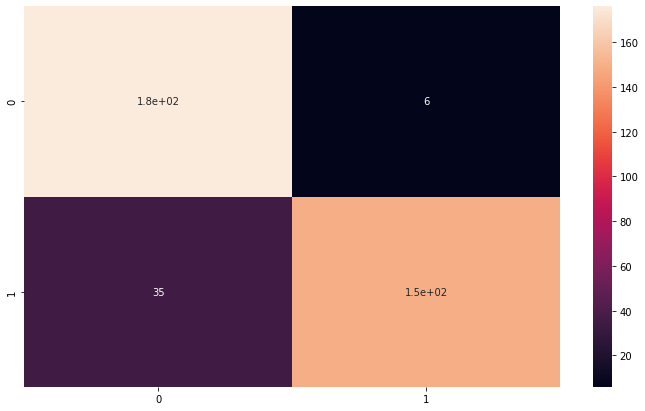

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

cf_matrix = confusion_matrix(actual_in_kfold[0], pred_in_kfold[0])

plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

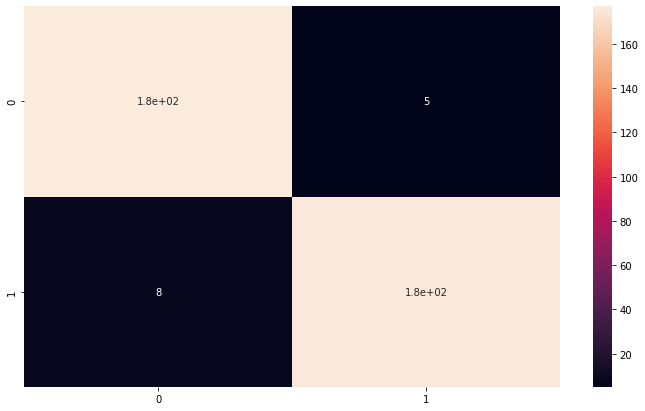

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[1], pred_in_kfold[1])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

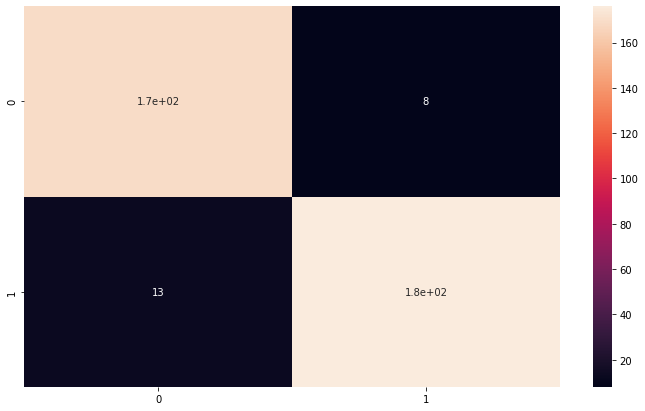

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[2], pred_in_kfold[2])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

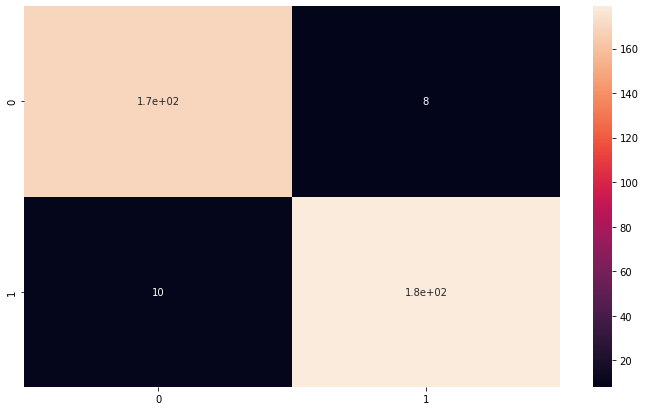

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[3], pred_in_kfold[3])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

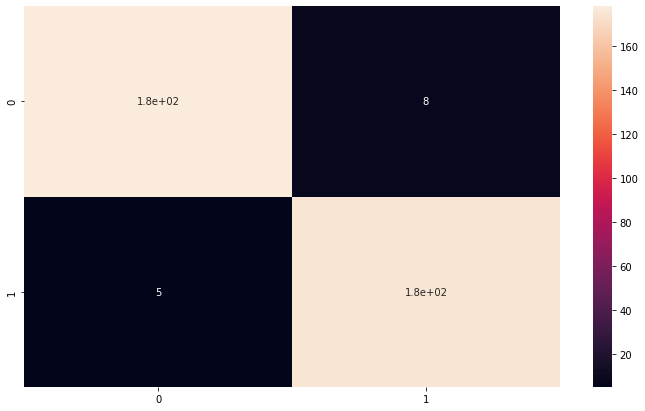

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[4], pred_in_kfold[4])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

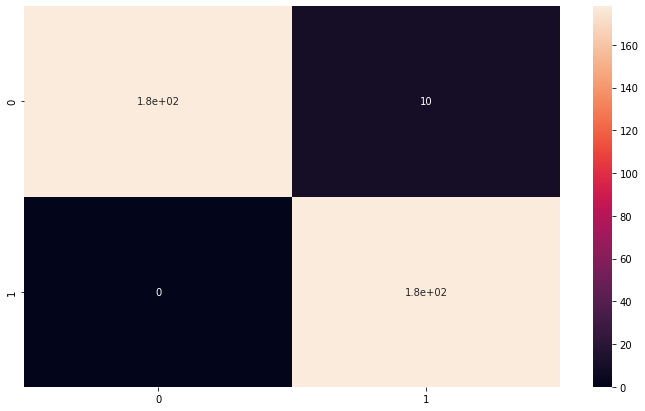

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[5], pred_in_kfold[5])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

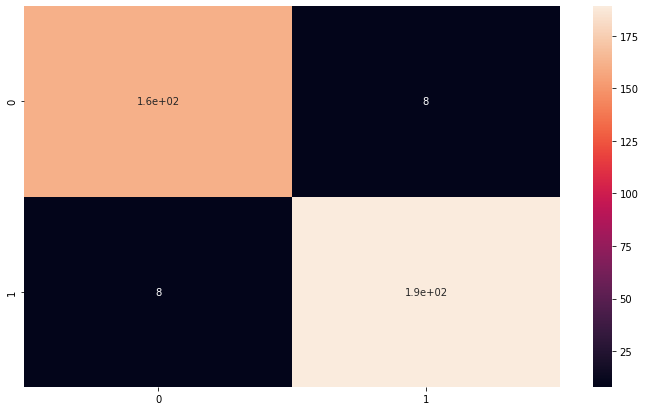

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[6], pred_in_kfold[6])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

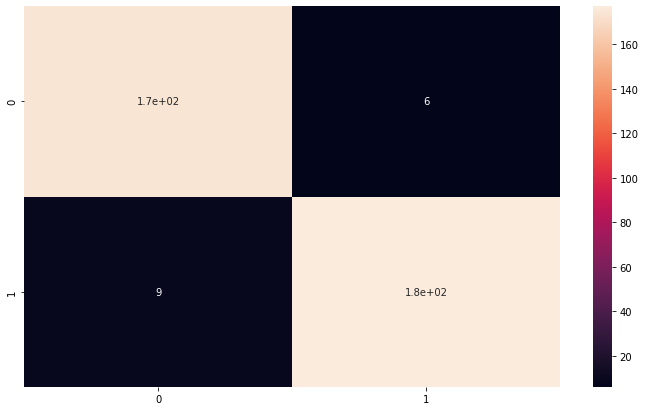

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[7], pred_in_kfold[7])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

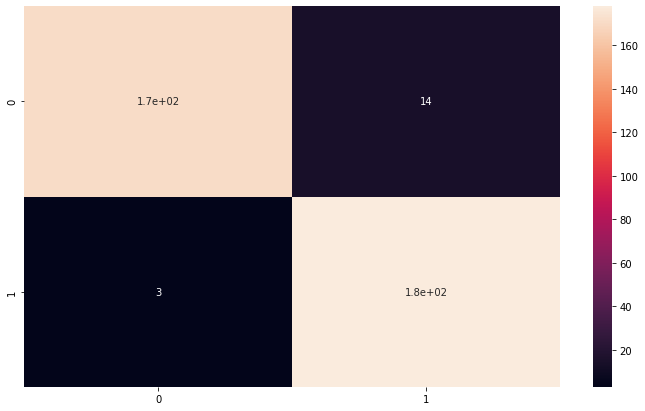

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[8], pred_in_kfold[8])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

<Axes: >

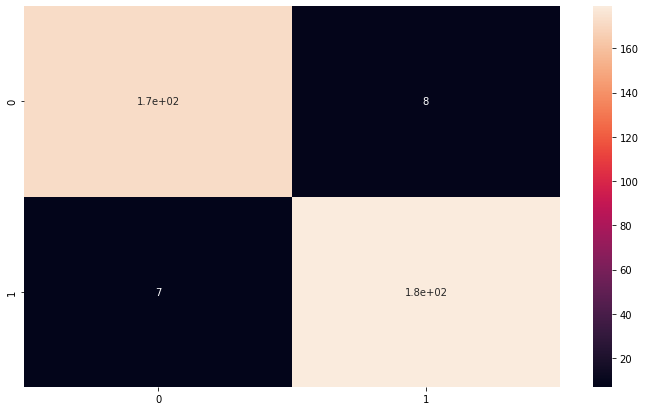

In [ ]:
cf_matrix = confusion_matrix(actual_in_kfold[9], pred_in_kfold[9])
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix, annot=True)

In [ ]:
# # model_name = "Decision Tree"
# plot_result("BP NN",
#             "Accuracy",
#             "Accuracy scores in 5 Folds",
#             test_accuracy_values,
#             test_accuracy_values)

# [Viz] for the Average Accuracy per k-fold (bar chart)

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
def Average(lst):
  return sum(lst) / len(lst)

In [ ]:
K = [1,2,3,4,5,6,7,8,9,10] 
avg_accuracy = []
for i in all_test_accuracy:
  avg = Average(i)
  avg_accuracy.append(avg)

In [ ]:
print(avg_accuracy)

[79.34426229508199, 94.8579234972678, 94.36885245901632, 95.08196721311471, 96.50546448087438, 96.87978142076501, 96.60382513661204, 95.90163934426228, 94.90983606557384, 96.27868852459007]


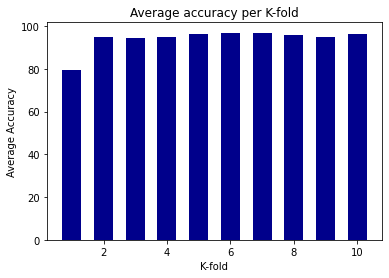

In [ ]:
plt.bar(K, avg_accuracy, color ='darkblue', width = 0.6)
plt.xlabel("K-fold")
plt.ylabel("Average Accuracy")
plt.title("Average accuracy per K-fold")
plt.show()

# PCF Calculations
- Recommended by the DOH: PCF Formula. Only a maximum number of facilities are allowed to be placed in a given area

## Computing for number of PCFs required

(Population Density)*(Land Area) = number of people

In [ ]:
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0
2,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2
3,38.0,88.0,Batong Buhay,PH175109004,Brush/Shrubs,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,MID,1
4,39.0,89.0,Malisbong,PH175109004,Brush/Shrubs,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,MID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1048.0,1327.0,Burgos,PH175109003,Brush/Shrubs,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,LOW,0
409,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0
410,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0
411,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0


In [ ]:
land_area = 7.073
def get_population_per_hex(land_area, population_density):
  population_per_hex = land_area * population_density
  return population_per_hex

In [ ]:
sablayan_clustered_df['POPULATION PER HEX'] = sablayan_clustered_df.apply(lambda row : get_population_per_hex(land_area, row['POPULATION DENSITY PER HEXAGON']), axis = 1)

In [ ]:
sablayan_clustered_df

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15,POPULATION PER HEX
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0,0.000000
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0,0.000000
2,22.0,51.0,San Agustin,PH175109004,Grassland,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,HIGH,2,2142.430830
3,38.0,88.0,Batong Buhay,PH175109004,Brush/Shrubs,0.0,168.775302,0.0,0.0,3.0,2.0,0.0,1.0,1307.880874,MID,1,1193.747713
4,39.0,89.0,Malisbong,PH175109004,Brush/Shrubs,0.0,239.737270,0.0,0.0,3.0,3.0,0.0,1.0,1822.383785,MID,1,1695.661709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1048.0,1327.0,Burgos,PH175109003,Brush/Shrubs,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,LOW,0,59.009644
409,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0,67.661267
410,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0,56.884392
411,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0,63.106267


In [ ]:
total_sablayan_population = sablayan_clustered_df['POPULATION PER HEX'].sum()
print(total_sablayan_population)

106291.2372388801


In [ ]:
# filter out hexagons with ones
print(sablayan_clustered_df['RHU'].unique())

[0.]


In [ ]:
# df with RHUs + df with buildable areas == SABLAYAN
# using this to compute for the total population
frames = [hex_with_rhu, sablayan_clustered_df]
sablayan_with_rhu = pd.concat(frames)
sablayan_with_rhu

,Unnamed: 0,id,BARANGAY,PSGC,LAND COVERAGE,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,Unnamed: 15,POPULATION PER HEX
16,43.0,93.0,Batong Buhay,PH175109002,Built Up,1.0,1590.110229,47.0,1.0,3.0,2.0,1.0,0.0,0.000000,LOW,0,NaN
133,191.0,311.0,Pag-Asa,PH175109008,Built Up,1.0,203.314786,5.0,1.0,2.0,0.0,0.0,0.0,0.000000,LOW,0,NaN
157,224.0,366.0,Burgos,PH175109011,barren,1.0,233.181617,0.0,1.0,0.0,3.0,3.0,0.0,0.000000,LOW,0,NaN
0,0.0,22.0,Ligaya,PH175109009,Brush/Shrubs,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,LOW,0,0.000000
1,10.0,23.0,Burgos,PH175109009,Brush/Shrubs,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,LOW,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1048.0,1327.0,Burgos,PH175109003,Brush/Shrubs,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,LOW,0,59.009644
409,1049.0,1328.0,Pag-Asa,PH175109003,Brush/Shrubs,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,LOW,0,67.661267
410,1056.0,1359.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,LOW,0,56.884392
411,1057.0,1360.0,Pag-Asa,PH175109008,Brush/Shrubs,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,LOW,0,63.106267


In [ ]:
edited_df

,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster
0,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,0
2,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,1
5,0.0,181.431633,1.0,1.0,3.0,1.0,2.0,1.0,453.967675,0
6,0.0,837.013031,0.0,1.0,2.0,1.0,1.0,1.0,2347.191042,1
...,...,...,...,...,...,...,...,...,...,...
408,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,0
409,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,0
410,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,0
411,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,0


In [ ]:
# total_sablayan_population
edited_df['POPULATION WITH NO ACCESS TO RHU PER HEX'] = edited_df.apply(lambda row : get_population_per_hex(land_area, row['POPULATION DENSITY PER HEXAGON']), axis = 1)

In [ ]:
edited_df

,RHU,POPULATION DENSITY PER HEXAGON,POIs PER HEXAGON,ROADS,STORM SURGE HAZARD LEVEL,FLOOD HAZARD LEVEL,LANDSLIDE HAZARD LEVEL,LANDCOVER NUMERICAL,HCFAI,Cluster,POPULATION WITH NO ACCESS TO RHU PER HEX
0,0.0,0.000000,1.0,1.0,0.0,0.0,2.0,1.0,0.000000,0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,1.0,0.000000,0,0.000000
2,0.0,302.902705,0.0,0.0,3.0,1.0,0.0,1.0,2469.775420,1,2142.430830
5,0.0,181.431633,1.0,1.0,3.0,1.0,2.0,1.0,453.967675,0,1283.265940
6,0.0,837.013031,0.0,1.0,2.0,1.0,1.0,1.0,2347.191042,1,5920.193168
...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,8.342944,0.0,0.0,0.0,0.0,3.0,1.0,116.390692,0,59.009644
409,0.0,9.566134,0.0,0.0,0.0,0.0,3.0,1.0,133.455163,0,67.661267
410,0.0,8.042470,0.0,0.0,0.0,0.0,3.0,1.0,112.198842,0,56.884392
411,0.0,8.922136,0.0,0.0,0.0,0.0,3.0,1.0,124.470876,0,63.106267


In [ ]:
total_sablayan_population_no_access_to_rhu = edited_df['POPULATION WITH NO ACCESS TO RHU PER HEX'].sum()
print(total_sablayan_population_no_access_to_rhu)

70019.48650695602


## PCF Calculation proper

In [ ]:
def PCF(population_no_access, total_population):
  percent = (population_no_access / total_population) * 100
  PCF = population_no_access / 20000
  return PCF

In [ ]:
print(PCF(total_sablayan_population_no_access_to_rhu, total_sablayan_population))

3.500974325347801


# Getting candidate sites
- Using low accessibility to get possible high accessible areas

In [ ]:
def low_k_fold_splitter(x,y,low_x,low_y):
  # unsure if we keep the split but i left it here
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

  # actual labels for testing
  y_test = low_y

  x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
  x_test_tensor = torch.tensor(low_x.values, dtype=torch.float)
  
  y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
  y_test_tensor = torch.tensor(low_y.values, dtype=torch.long)

  # Splits X and Y tensors
  train_data = TrainData(x_train_tensor, y_train_tensor)
  test_data = TestData(x_test_tensor, y_test_tensor)

  # Data Loader
  BATCH_SIZE = 64 # ✈️ GO BACK TO THIS NEXT SEM - something u can optimize pa
  train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
  test_loader = DataLoader(dataset=test_data, batch_size=1)
  

  return train_loader, test_loader, x_test_tensor, y_test

In [ ]:
global all_train_loss
all_train_loss = []

global all_test_average_loss_values
all_test_average_loss_values  = []

global all_test_accuracy
all_test_accuracy = []

global all_pred_per_kfold
all_pred_per_kfold = []

global all_actual_per_kfold
all_actual_per_kfold = []

global actual_in_kfold
actual_in_kfold = []

global pred_in_kfold
pred_in_kfold = []

global hexid_per_kfold
hexid_per_kfold = []

In [ ]:
for k in range(10):
  print(k)
  # train_loader, test_loader, x_test_tensor, y_test = k_fold_splitter(x_normalized, y_sample)
  train_loader, test_loader, x_test_tensor, y_test = low_k_fold_splitter(x_normalized, y_sample, filtered_low_accessible_x, filtered_labels_y)

  test_loss_values = []
  test_average_loss_values = []
  test_accuracy_values = []

  epochs = 100
  for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)

  # predictions per k-fold
  predictions = model(x_test_tensor)
  predictions = F.softmax(predictions)
  predictions = torch.argmax(predictions, dim=1)

  pred_in_kfold.append(predictions)

  # actual y values per k-fold
  actual_y = y_test

  # hexids per k-fold
  # hexid = y_test['id'].values

  #🌈 Appending small list to big list

  # loss
  all_train_loss.append(train_loss_values)
  all_test_average_loss_values.append(test_average_loss_values)

  # accuracy
  all_test_accuracy.append(test_accuracy_values)

  # y pred and actual y
  actual_in_kfold.append(actual_y)
  all_pred_per_kfold.append(pred_in_kfold)
  all_actual_per_kfold.append(actual_y.tolist())

  # # hexids
  # hexid_per_kfold.append(hexid.tolist())

  print("Done!")

Streaming output truncated to the last 5000 lines.
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 48
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 49
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 50
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 51
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 52
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 53
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 54
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 55
-------------------------------
0
1
2
3
4
5
Test Error: 
 Accuracy: 94.8%, Avg loss: 0.626596 

Epoch 56
-------------------------------
0
1
2


In [ ]:
# results['hex_id'] = hexid_per_kfold[0]
results['pred_y'] = all_pred_per_kfold[0][0]
results['actual_y'] = all_actual_per_kfold[0][0]

In [ ]:
results = pd.concat([results, y_filtered_labels_id], axis=1)

In [ ]:
results = results.drop(['index'], axis=1)

In [ ]:
results = results[results['pred_y'] == 1]
results

,pred_y,actual_y,id,Cluster
0,1,0,22,0
2,1,0,95,0
3,1,0,129,0
4,1,0,130,0
5,1,0,131,0
6,1,0,132,0
13,1,0,199,0
14,1,0,201,0
15,1,0,204,0
16,1,0,232,0


# Recursion for optimization
- This is where we eliminate adjacent hexagons and find the optimal locations given candidate sites. 
- This is also where we calculate the HCFAI of the entire Sablayan area. 
- Given DOH's recommended PCF forumala for accessibility, we will be selecting a total of 7 locations (4 locations found by the model and 3 existing RHU locations)
- This process is repeated until all 7 locations are found.

In [ ]:
def HCI_calc (total_ai, yi, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei):
    w_bi = 0.30
    w_ci = 0.25
    w_di = 0.30
    w_ei = 0.15

    a = total_ai - (total_ai*yi)
    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di*w_di) + (1/(hazard1_ei + 1*w_ei)) + (1/(hazard2_ei+1*w_ei)) + (1/(hazard3_ei+1*w_ei))
    hci = (a*b)
    
    return hci

In [ ]:
# Computing overall HCFAI using SUM
def overallHCFAI(sablayan_clustered_df):
  HCFAI_overall = sablayan_clustered_df.loc[:, 'HCFAI'].sum() 
  return HCFAI_overall

In [ ]:
def getTop4(HCFAI_overall,candidate_sites, top4):
  # results_with_hcfai = results_with_hcfai.loc[:,['id', 'HCFAI']]
  # arrange and get top4.
  if top4.empty:
    candidate_sites = candidate_sites.merge(results, on=['id']) # arrange in descending order
    candidate_sites = candidate_sites.sort_values(by=['HCFAI'], ascending = False)
    # renamed HCFAI into "original HCFAI"
    candidate_sites = candidate_sites.rename(columns={"HCFAI": "original HCFAI"})
    top4 = candidate_sites.iloc[:4]
    candidate_sites.drop(candidate_sites.index[:4], inplace=True)
    
  elif len(top4) < 4:
    while len(top4) < 4:
      # append the first
      top4.append(candidate_sites.head(1))
      candidate_sites.drop(candidate_sites.index[0], inplace=True)

  return top4, candidate_sites

In [ ]:
def recomputeHCFAI(top4):
  # Getting column values to recompute updated HCFAI
  pop_den = top4.loc[:,"POPULATION DENSITY PER HEXAGON"]

  # top4.at[:, 'RHU'] = int('1')
  top4['RHU'] = top4['RHU'].replace(0,1)

  rhu_exists = top4.loc[:,"RHU"]
  road_exists = top4.loc[:,"ROADS"]
  no_of_pois = top4.loc[:,"POIs PER HEXAGON"]
  landcov_value = top4.loc[:,"LANDCOVER NUMERICAL"]
  stormsurge_level = top4.loc[:,"STORM SURGE HAZARD LEVEL"]
  flood_level = top4.loc[:,"FLOOD HAZARD LEVEL"]
  landslide_level = top4.loc[:,"LANDSLIDE HAZARD LEVEL"]
  # compute for new HCFAI where RHU = 1 
  new_HCFAI = HCI_calc(pop_den, rhu_exists, road_exists, no_of_pois, landcov_value, stormsurge_level, flood_level, landslide_level)

  top4['new HCFAI'] = new_HCFAI
  return top4

In [ ]:
def updateOverallHCFAIValue(sablayan_clustered_df,top4):
  # copying column into updated HCFAI
  # sablayan_clustered_df['updated HCFAI'] = sablayan_clustered_df.loc[:, 'HCFAI']
  # automate getting indexes of top4
  # Using Series.values.tolist()
  indexes_top4 = top4.id.values.tolist()
  for i in indexes_top4:
    sablayan_clustered_df.loc[i, ['HCFAI']] = [0]
  return sablayan_clustered_df

In [ ]:
def getNeighbours(top4):
  neighbors_df = pd.read_csv(data_dir + 'neighbors_csv.csv')

  # List of ALL hexagons with RHUs
  with_RHU_indices = top4['id'].tolist()
  # add existing RHUs
  with_RHU_indices.append(93.0)
  with_RHU_indices.append(311.0)
  with_RHU_indices.append(366.0)

  raw_sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')

  # get neighbors of with_RHU

  # get index of with_RHU
  idx_with_RHU = raw_sablayan_clustered_df[raw_sablayan_clustered_df['RHU'] == 1]

  # get specific rows of with_RHU in neighbor df
  df_with_RHU = pd.DataFrame()

  # making df candidate sites with neighbors because we have a list of ids 
  # with RHU -- (candidates + rhu) so now, we need to get the dataframe WITH THE NEIGHBORS
  for i in range(len(with_RHU_indices)):
    o = neighbors_df[neighbors_df['id'] == with_RHU_indices[i]]
    if df_with_RHU.empty: # assumes no laman :>
      df_with_RHU = df_with_RHU.append(o)
    elif o['id'].values not in df_with_RHU['id'].values: # ids exist but we handle dups here
      # print(o['id'])
      df_with_RHU = df_with_RHU.append(o)

  # print("This is df_with_RHU ids ", df_with_RHU['id'].values)

  # neighbour data prep ( making neighbors standardized )
  neighbors_df['neighbours'] = neighbors_df['neighbours'].apply(lambda x: x.split(","))

  # 1. 'transform' dataframe
  neighbors_df = neighbors_df.explode('neighbours')
  neighbors_df['id'] = neighbors_df['id'].astype(int)
  neighbors_df['neighbours'] = neighbors_df['neighbours'].astype(float)

  df_with_RHU['neighbours'] = df_with_RHU['neighbours'].apply(lambda x: x.split(","))
  df_with_RHU = df_with_RHU.explode('neighbours')
  df_with_RHU['neighbours'] = df_with_RHU['neighbours'].astype(float)

  # removing adjacent ids
  for i in with_RHU_indices:
    if i in df_with_RHU['neighbours'].values:
      with_RHU_indices.remove(i)
      top4 = top4.drop(top4[top4['id'] == i].index)
      # find specific idx to remove from top 4
  return with_RHU_indices

In [ ]:
def optimize(sablayan_df):
  raw_sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
  # calculate overall HCFAI
  old_HCFAI_overall = overallHCFAI(raw_sablayan_clustered_df)
  print("Old Overall: ", old_HCFAI_overall)

  # this is the loop
  with_RHU_indices = list()
  top4 = pd.DataFrame()
  i=0
  # arrange in descending order (HCFAI)
  top4, candidate_sites = getTop4(old_HCFAI_overall, sablayan_df, top4)
  while len(with_RHU_indices) != 7: # 3 existing RHUs + 4 possible candidate sites
    # get top 4 candidate sites, change RHU=1, recompute HCFAI
    top4 = recomputeHCFAI(top4)
    # call HCFAIoverall again to get the new HCFAI with candidate sites (top 4)
    sablayan_df = updateOverallHCFAIValue(raw_sablayan_clustered_df, top4)
   
    with_RHU_indices = getNeighbours(top4)
    HCFAI_overall = overallHCFAI(sablayan_df)
    print("New Overall: [[OPTIMIZED]] ", HCFAI_overall)
     # ACCEPTS
    if len(with_RHU_indices) == 7:
      print("Accept!!!!!!!!!!!!!!")
      return with_RHU_indices, HCFAI_overall, old_HCFAI_overall
      # instead of sablayan_df, we load results_with_hcfai
        # drop top4 from sablayan cluster
    # REJECT condition
    else:
      top4, candidate_sites = getTop4(HCFAI_overall, candidate_sites,top4)
      print("Reject!!!!!!!!!!!!!!")
      i+=1
  return with_RHU_indices, HCFAI_overall, old_HCFAI_overall

In [ ]:
optimal_locations, optimal_HCFAI, HCFAI_overall = optimize(sablayan_clustered_df)
print(optimal_locations)
print(optimal_HCFAI)

Old Overall:  415161.55992098997
New Overall: [[OPTIMIZED]]  412699.66434599005
Accept!!!!!!!!!!!!!!
[232.0, 237.0, 417.0, 684.0, 93.0, 311.0, 366.0]
412699.66434599005


## Randomizing locations vs. Our algorithm

In [ ]:
# Python program to get average of a list
def getAvgHCFAI(lst):
    return sum(lst) / len(lst)

In [ ]:
def getRandom4(candidate_sites):
  candidate_sites = candidate_sites.merge(results, on=['id']) # arrange in descending order
  candidate_sites = candidate_sites.rename(columns={"HCFAI": "original HCFAI"}) # renamed HCFAI into "original HCFAI"
  random4 = candidate_sites.sample(n=4)
  return random4

1. Get all candidate sites (and its ids)
2. Get random 4 candidate sites
3. Recompute overall HCFAI
4. do this 10 times
5. Get the avg HCFAI of the 10 times
6. compare with optimized HCFAI 

In [ ]:
def randomize(sablayan_df):
  # use clustered to get top 4
  # use raw for the overall
  raw_sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
  HCFAI_overall = overallHCFAI(raw_sablayan_clustered_df)
  print("=========== Overall HCFAI (before) ============ ", HCFAI_overall)
  
  # get the list of ids of predicted locations
  random4 = getRandom4(sablayan_df)
  random4 = recomputeHCFAI(random4)
  sablayan_df = updateOverallHCFAIValue(raw_sablayan_clustered_df, random4)
  HCFAI_overall = overallHCFAI(sablayan_df)
  rdm4_list = random4['id'].tolist()
  # print("This is random4: ", random4['id'].tolist())
  # print("This is random4's HCFAI: ", random4['updated HCFAI'].tolist())
  print("=========== Overall HCFAI (after) ============ ", HCFAI_overall)

  return HCFAI_overall, rdm4_list

In [ ]:
rdm_hcfai = list()
rdm_points = list()
repeat = 0
while repeat < 10: 
  rdm_ovHCFAI, rdm4 = randomize(sablayan_clustered_df)
  rdm_hcfai.append(rdm_ovHCFAI)
  rdm_points.append(rdm4)
  repeat+=1

print(len(rdm_hcfai))
rdm_HCFAI = getAvgHCFAI(rdm_hcfai)
print("New avg hcfai [[RANDOM]]: ", rdm_HCFAI)

=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  414488.81384258
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  413613.05307137
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  413739.31256340997
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  413366.06192879
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  412748.85128705995
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  413946.64896878
=========== Overall HCFAI (before) ============  415161.55992098997
=========== Overall HCFAI (after) ============  413781.24768381007
=========== Overall HCFAI (before) ============  415161.55992098997

In [ ]:
print("=========== RANDOM RESULTS ===========")
print("RANDOMIZED HCFAI: ", rdm_HCFAI)
print("============ OPTIMIZED RESULTS ==========")
print("Optimal locations: ", optimal_locations)
print("OPTIMAL HCFAI: ", optimal_HCFAI)

=========== RANDOM RESULTS ===========
RANDOMIZED HCFAI:  413481.526309197
============ OPTIMIZED RESULTS ==========
Optimal locations:  [232.0, 237.0, 417.0, 684.0, 93.0, 311.0, 366.0]
OPTIMAL HCFAI:  412699.66434599005


In [ ]:
## making a df of all random points
Results_rdmsum =  pd.DataFrame(
    {'Hex IDs': rdm_points,
     'HCFAI': rdm_hcfai
    })
Results_rdmsum

,Hex IDs,HCFAI
0,"[803.0, 131.0, 129.0, 237.0]",414488.813843
1,"[129.0, 237.0, 95.0, 232.0]",413613.053071
2,"[131.0, 204.0, 95.0, 132.0]",413739.312563
3,"[22.0, 204.0, 132.0, 199.0]",413366.061929
4,"[240.0, 131.0, 417.0, 199.0]",412748.851287
5,"[129.0, 132.0, 204.0, 837.0]",413946.648969
6,"[232.0, 237.0, 684.0, 95.0]",413781.247684
7,"[837.0, 95.0, 201.0, 132.0]",413377.200862
8,"[132.0, 129.0, 417.0, 232.0]",412116.731167
9,"[837.0, 374.0, 129.0, 417.0]",413637.341717


## Computing overall HCFAI using AVG -- USING OUR ALGORITHM

In [ ]:
# Computing overall HCFAI using AVG
def overallHCFAI_avg(sablayan_clustered_df):
  HCFAI_overall = sablayan_clustered_df.loc[:, 'HCFAI'].mean() 
  return HCFAI_overall

In [ ]:
def optimize(sablayan_df):
  raw_sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
  # calculate overall HCFAI
  old_HCFAI_overall_avg = overallHCFAI_avg(raw_sablayan_clustered_df)
  print("Old Overall: ", old_HCFAI_overall_avg)
  # this is the loop
  with_RHU_indices = list()
  top4 = pd.DataFrame()
  i=0
  # arrange in descending order (HCFAI)
  top4, candidate_sites = getTop4(old_HCFAI_overall_avg, sablayan_df, top4)
  while len(with_RHU_indices) != 7: # 3 existing RHUs + 4 possible candidate sites
  # while i < 5: # 3 existing RHUs + 4 possible candidate sites
    # get top 4 candidate sites, change RHU=1, recompute HCFAI
    top4 = recomputeHCFAI(top4)
    # call HCFAIoverall again to get the new HCFAI with candidate sites (top 4)
    sablayan_df = updateOverallHCFAIValue(raw_sablayan_clustered_df, top4)
   
    with_RHU_indices = getNeighbours(top4)
    HCFAI_overall_avg = overallHCFAI_avg(sablayan_df)
    print("New Overall: [[OPTIMIZED]] ", HCFAI_overall_avg)
     # ACCEPTS
    if len(with_RHU_indices) == 7:
      print("Accept!!!!!!!!!!!!!!")
      return with_RHU_indices, HCFAI_overall_avg, old_HCFAI_overall_avg
      # instead of sablayan_df, we load results_with_hcfai
        # drop top4 from sablayan cluster
    # REJECT condition
    else:
      top4, candidate_sites = getTop4(HCFAI_overall_avg, candidate_sites,top4)
      print("Reject!!!!!!!!!!!!!!")
      i+=1
  return with_RHU_indices, HCFAI_overall_avg, old_HCFAI_overall_avg

In [ ]:
optimal_locations_avg, optimal_HCFAI_avg, HCFAI_overall_avg = optimize(sablayan_clustered_df)
print(optimal_locations_avg)
print(optimal_HCFAI_avg)

Old Overall:  429.3294311489038
New Overall: [[OPTIMIZED]]  426.78352052325755
Accept!!!!!!!!!!!!!!
[232.0, 237.0, 417.0, 684.0, 93.0, 311.0, 366.0]
426.78352052325755


## Computing overall HCFAI using AVG -- USING RANDOM 

In [ ]:
def randomize_avg(sablayan_df):
  # use clustered to get top 4
  # use raw for the overall
  raw_sablayan_clustered_df = pd.read_csv(data_dir + 'Sablayan_Data_Clustered.csv')
  HCFAI_overall = overallHCFAI_avg(raw_sablayan_clustered_df)
  print("=========== Overall HCFAI (before) ============ ", HCFAI_overall)
  
  # get the list of ids of predicted locations
  random4 = getRandom4(sablayan_df)
  random4 = recomputeHCFAI(random4)
  sablayan_df = updateOverallHCFAIValue(raw_sablayan_clustered_df, random4)
  HCFAI_overall = overallHCFAI_avg(sablayan_df)
  rdm4_list = random4['id'].tolist()
  # print("This is random4: ", random4['id'].tolist())
  # print("This is random4's HCFAI: ", random4['updated HCFAI'].tolist())
  print("=========== Overall HCFAI (after) ============ ", HCFAI_overall)

  return HCFAI_overall, rdm4_list

In [ ]:
rdm_hcfai = list()
rdm_points = list()
repeat = 0
while repeat < 10: 
  rdm_ovHCFAI, rdm4 = randomize_avg(sablayan_clustered_df)
  rdm_hcfai.append(rdm_ovHCFAI)
  rdm_points.append(rdm4)
  repeat+=1


print(len(rdm_hcfai))
rdm_HCFAI_avg = getAvgHCFAI(rdm_hcfai)
print("New avg hcfai [[RANDOM]]: ", rdm_HCFAI_avg)

=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  427.4617190291106
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  426.17884908923475
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  427.86679112526366
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  427.89318261287485
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  426.44534640047567
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  427.5016261866598
=========== Overall HCFAI (before) ============  429.3294311489038
=========== Overall HCFAI (after) ============  428.6472545768252
=========== Overall HCFAI (before) ============  429.329431148903

In [ ]:
Results_rdmavg =  pd.DataFrame(
    {'Hex IDs': rdm_points,
     'HCFAI': rdm_hcfai
    })
Results_rdmavg

,Hex IDs,HCFAI
0,"[201.0, 129.0, 237.0, 131.0]",427.461719
1,"[201.0, 129.0, 204.0, 417.0]",426.178849
2,"[232.0, 237.0, 267.0, 95.0]",427.866791
3,"[267.0, 22.0, 132.0, 199.0]",427.893183
4,"[201.0, 232.0, 240.0, 130.0]",426.445346
5,"[837.0, 95.0, 232.0, 204.0]",427.501626
6,"[131.0, 803.0, 240.0, 345.0]",428.647255
7,"[199.0, 684.0, 132.0, 803.0]",427.891355
8,"[22.0, 232.0, 132.0, 837.0]",427.595251
9,"[132.0, 240.0, 130.0, 22.0]",428.344309


In [ ]:
print("=========== RANDOM RESULTS ===========")
print("RANDOMIZED HCFAI: ", rdm_HCFAI_avg)
print("============ OPTIMIZED RESULTS ==========")
print("Optimal locations: ", optimal_locations)
print("OPTIMAL HCFAI: ", optimal_HCFAI_avg) 

=========== RANDOM RESULTS ===========
RANDOMIZED HCFAI:  427.58256836501243
============ OPTIMIZED RESULTS ==========
Optimal locations:  [232.0, 237.0, 417.0, 684.0, 93.0, 311.0, 366.0]
OPTIMAL HCFAI:  426.78352052325755


# Preparing the tables for results

In [ ]:
 ''' Put in list
 1. OLD HCFAIs
 2. NEW HCFAIs Random
 3. NEW HCFAIs Our Algorithm
 '''

old_hcfai = []
old_hcfai.append(HCFAI_overall)
old_hcfai.append(HCFAI_overall_avg)

rdmHCFAI = []
rdmHCFAI.append(rdm_HCFAI)
rdmHCFAI.append(rdm_HCFAI_avg)

opt_HCFAI = []
opt_HCFAI.append(optimal_HCFAI)
opt_HCFAI.append(optimal_HCFAI_avg)

In [ ]:
Results_1 =  pd.DataFrame(
    {' ': ['SUM', "AVG"],
    'Old HCFAI': old_hcfai,
     'Randomized HCFAI': rdmHCFAI,
     'Algorithm HCFAI': opt_HCFAI
    })

In [ ]:
Results_1

,,Old HCFAI,Randomized HCFAI,Algorithm HCFAI
0,SUM,415161.559921,413481.526309,412699.664346
1,AVG,429.329431,427.582568,426.783521


In [ ]:
print('old', old_hcfai)
print('rdm', rdmHCFAI)
print('opt', opt_HCFAI)

old [415161.55992098997, 429.3294311489038]
rdm [413481.526309197, 427.58256836501243]
opt [412699.66434599005, 426.78352052325755]


# Visualization for Results
- old HCFAI
- Randomized HCFAI
- Algorithm HCFAI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Results_1.iloc[[0]]
Results_1.iloc[[1]]

,,Old HCFAI,Randomized HCFAI,Algorithm HCFAI
1,AVG,429.329431,427.582568,426.783521


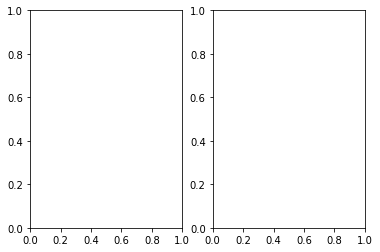

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

<Axes: >

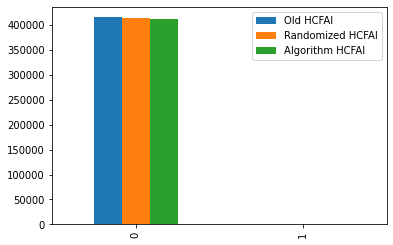

In [ ]:
# Results_1.iloc[[0,1],[0,1]].plot(kind="bar")
Results_1.iloc[[0,1]].plot(kind="bar")

Text(0.5, 1.0, 'Average results')

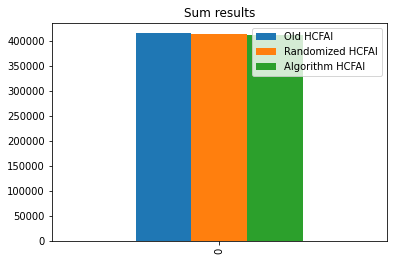

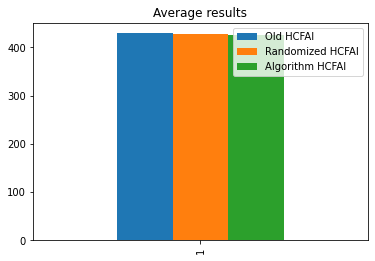

In [ ]:
sum_df = Results_1.iloc[[0]].plot(kind="bar")
sum_df.set_title('Sum results')
# Results_1.iloc[[0]].set_xticks(ind+width)
# viol_plot.set_xticklabels( ('A', 'B','C') )
avg_df = Results_1.iloc[[1]].plot(kind="bar")
avg_df.set_title('Average results')